<a href="https://colab.research.google.com/github/Kvj-Harsha/ds/blob/main/CS23B1034_FoML_Asgn_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## FoML Assignment 01 - Practical Implementation of Dession Tree

Fitting 5 folds for each of 432 candidates, totalling 2160 fits
Best Parameters: {'max_depth': 5, 'max_features': None, 'max_leaf_nodes': 10, 'min_samples_leaf': 4, 'min_samples_split': 2}

Evaluation Metrics:
MSE  : 3301.9056
RMSE : 57.4622
MAE  : 47.4816
R²   : 0.3768


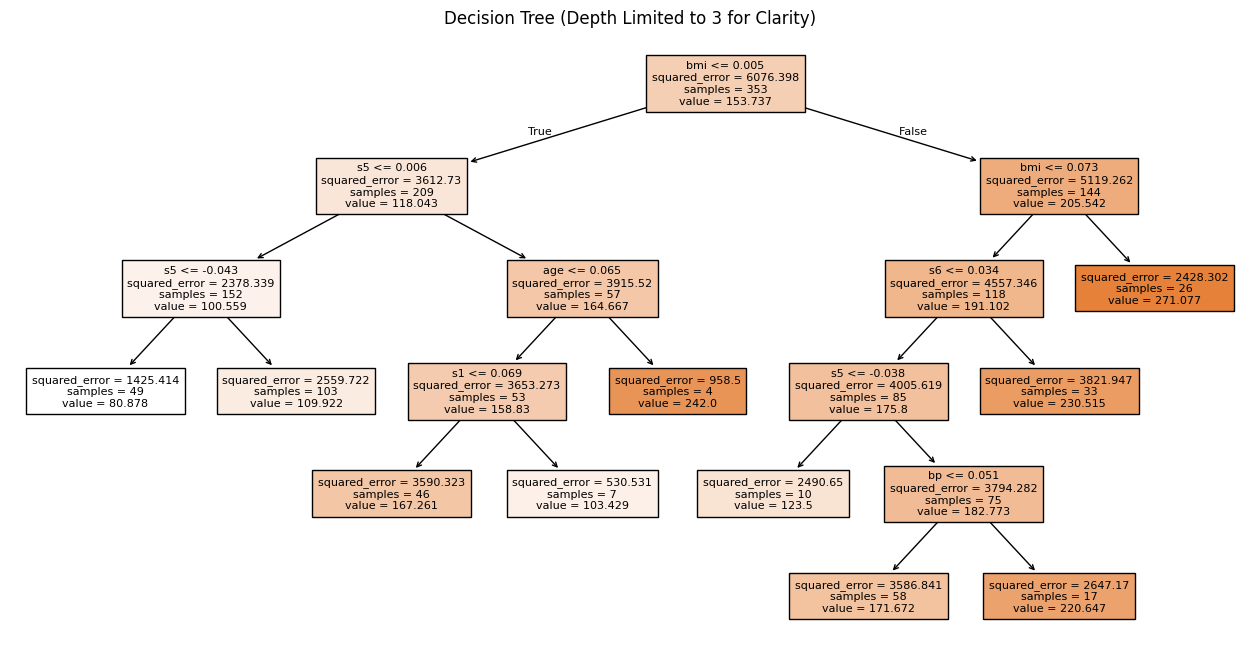

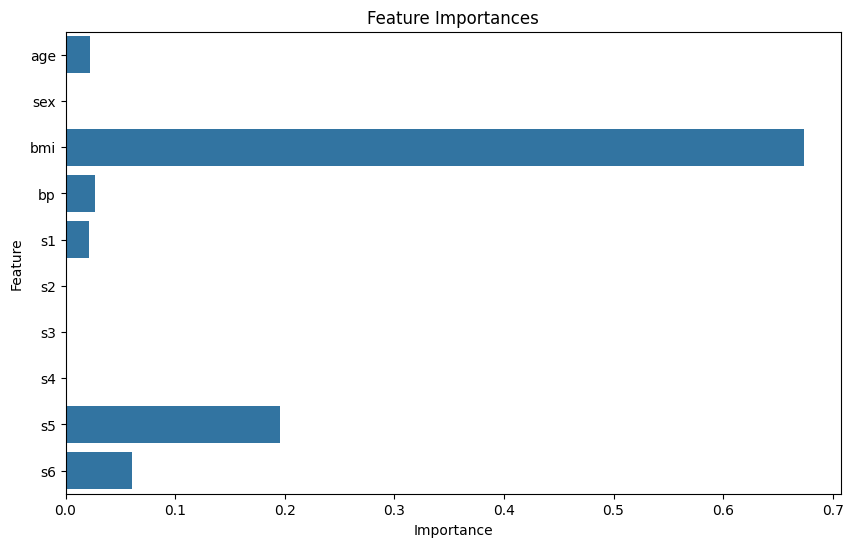

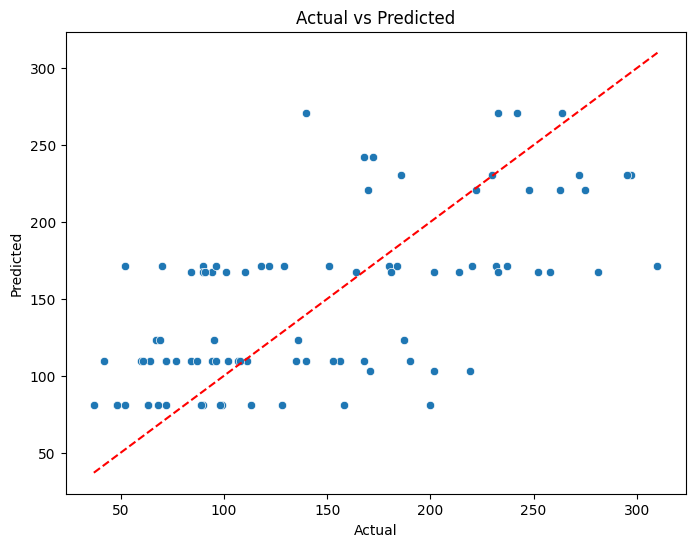

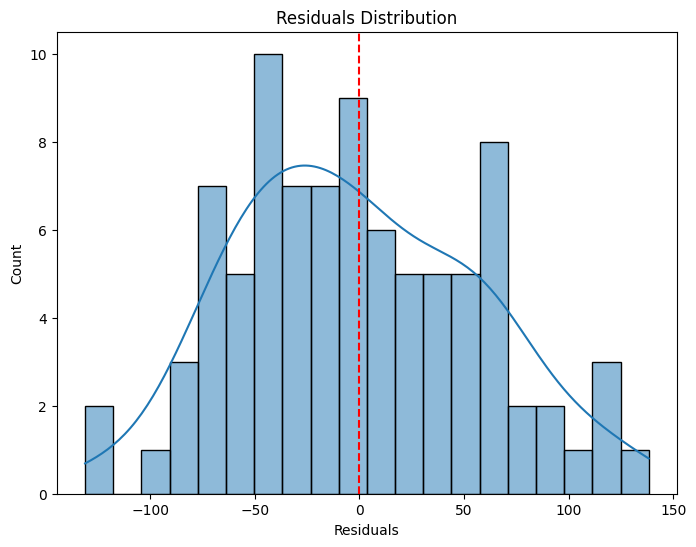

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load dataset
X, y = load_diabetes(return_X_y=True)
feature_names = load_diabetes().feature_names

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Define Decision Tree Regressor
dt = DecisionTreeRegressor(random_state=42)

# Hyperparameter grid
param_grid = {
    "max_depth": [3, 5, 10, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_leaf_nodes": [None, 10, 20, 50],
    "max_features": [None, "sqrt", "log2"]
}

# Grid Search
grid_search = GridSearchCV(
    estimator=dt,
    param_grid=param_grid,
    scoring="neg_mean_squared_error",
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# Predictions
y_pred = best_model.predict(X_test)

# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nEvaluation Metrics:")
print(f"MSE  : {mse:.4f}")
print(f"RMSE : {rmse:.4f}")
print(f"MAE  : {mae:.4f}")
print(f"R²   : {r2:.4f}")

# -------------------- Visualizations --------------------

# 1. Plot the decision tree (limited depth for readability)
plt.figure(figsize=(16, 8))
plot_tree(best_model, feature_names=feature_names, filled=True, fontsize=8, max_depth=5)
plt.title("Decision Tree (Depth Limited to 3 for Clarity)")
plt.show()

# 2. Feature Importance
importances = best_model.feature_importances_
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

# 3. Actual vs Predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="--")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.show()

# 4. Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, bins=20, kde=True)
plt.axvline(0, color="red", linestyle="--")
plt.title("Residuals Distribution")
plt.xlabel("Residuals")
plt.show()
